<a href="https://colab.research.google.com/github/plaban1981/Dphi_hackathon/blob/main/Hyperparameter_optimization_technique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset : https://www.kaggle.com/iabhishekofficial/mobile-price-classification


In [1]:
!unzip "/content/archive (1).zip"

Archive:  /content/archive (1).zip
  inflating: test.csv                
  inflating: train.csv               


## Load Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")

In [4]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


##  Training Stats

In [5]:
train.shape

(2000, 21)

In [ ]:
train.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


## check for missing values if any 

In [6]:
train.isnull().sum()[train.isnull().sum() > 0]

Series([], dtype: int64)

In [7]:
X = train.drop("price_range",axis=1)
Y = train['price_range']

In [8]:
!pip install scikit-learn==0.24.1

     |████████████████████████████████| 22.3MB 1.2MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Hyperoptimization Techniques Covered :
* GridSearchCV
* RandomizedSearchCV
* HalvingGridSearchCV
* HalvingRandomSearchCV
* Bayesian Optimisation using scikit-optimization
* Hyperopt using Optuna

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import accuracy_score


In [ ]:
rf = RandomForestClassifier()
rf

RandomForestClassifier()

In [25]:
np.random.uniform(0.1,1,5)

array([0.76428017, 0.17856515, 0.24612943, 0.30642318, 0.69002882])

In [28]:
params = {'n_estimators':[100,200,300,400,500],
          'max_depth': [2,5,7,8,10],
          'criterion':['gini','entropy'],
          'max_features' : np.random.uniform(0.1,1,5),
          'random_state':[42,100,700,1234]}

In [29]:
grid = GridSearchCV(estimator=rf,
                    param_grid=params,
                    scoring = 'accuracy',
                    verbose=10,
                    cv=5,
                    n_jobs=-1)

In [30]:
import time

start = time.time()
grid.fit(X,Y)
end = time.time()

print(f'total time {end - start} in seconds')

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
total time 2247.5584478378296 in seconds


In [31]:
print(grid.best_params_)
print(grid.best_estimator_)

{'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.855239859975857, 'n_estimators': 500, 'random_state': 100}
RandomForestClassifier(criterion='entropy', max_depth=10,
                       max_features=0.855239859975857, n_estimators=500,
                       random_state=100)


## Accuracy score for parameters selected by GridSearchCV

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)
rf = RandomForestClassifier(criterion='entropy', max_depth=10,
                       max_features=0.855239859975857, n_estimators=500,
                       random_state=100)
                       
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"accuracy for parameters selected by GridSearchCV : {accuracy_score(y_test,y_pred) *100.0}%")


accuracy for parameters selected by GridSearchCV : 95.0%


## RandomizedSearchCV

In [35]:
rf = RandomForestClassifier()

In [36]:
grid_random = RandomizedSearchCV(estimator=rf,
                                 param_distributions = params,
                                 scoring='accuracy',
                                 verbose=10,
                                 cv=5,
                                 n_jobs=-1)


In [37]:
import time

start = time.time()
grid_random.fit(X,Y)
end = time.time()

print(f'total time {end - start} in seconds')

print(grid_random.best_params_)
print(grid_random.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
total time 24.80034565925598 in seconds
{'random_state': 42, 'n_estimators': 500, 'max_features': 0.5311153082821708, 'max_depth': 10, 'criterion': 'entropy'}
RandomForestClassifier(criterion='entropy', max_depth=10,
                       max_features=0.5311153082821708, n_estimators=500,
                       random_state=42)


## Accuracy score for parameters selected by RandomizedSearchCV

In [38]:
rf = RandomForestClassifier(criterion='entropy', max_depth=10,
                       max_features=0.5311153082821708, n_estimators=500,
                       random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"accuracy for parameters selected by RandomizedSearchCV : {accuracy_score(y_test,y_pred) *100.0}%")


accuracy for parameters selected by RandomizedSearchCV : 95.5%


## HalvingGridSearchCV

In [ ]:
len(X.columns)

20

* resource'n_samples' or str, default=’n_samples’
Defines the resource that increases with each iteration. By default, the resource is the number of samples. It can also be set to any parameter of the base estimator that accepts positive integer values, e.g. ‘n_iterations’ or ‘n_estimators’ for a gradient boosting estimator. In this case max_resources cannot be ‘auto’ and must be set explicitly.

* max_resourcesint, default=’auto’
The maximum amount of resource that any candidate is allowed to use for a given iteration. By default, this is set to n_samples when resource='n_samples' (default), else an error is raised.

* min_resources{‘exhaust’, ‘smallest’} or int, default=’exhaust’
The minimum amount of resource that any candidate is allowed to use for a given iteration. Equivalently, this defines the amount of resources r0 that are allocated for each candidate at the first iteration.

  *  ‘smallest’ is a heuristic that sets r0 to a small value:
n_splits * 2 when resource='n_samples' for a regression
problem

  * n_classes * n_splits * 2 when resource='n_samples' for a
classification problem

  * 1 when resource != 'n_samples'

In [39]:
import time
rf = RandomForestClassifier()
start = time.time()
grid_halving = HalvingGridSearchCV(rf, params,
                                   max_resources=100,random_state=42)
grid_halving.fit(X,Y)
end = time.time()

print(f'total time {end - start} in milliseconds')
print(grid_halving.best_params_)
print(grid_halving.best_estimator_)

total time 1871.6434400081635 in milliseconds
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.855239859975857, 'n_estimators': 200, 'random_state': 42}
RandomForestClassifier(criterion='entropy', max_depth=5,
                       max_features=0.855239859975857, n_estimators=200,
                       random_state=42)


## Accuracy Score obtained by the hyperparemeters selected by HalvingGridSearchCV

In [40]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5,
                       max_features=0.855239859975857, n_estimators=200,
                       random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"accuracy for parameters selected by HalvingGridSearchCV : {accuracy_score(y_test,y_pred) *100.0}%")


accuracy for parameters selected by HalvingGridSearchCV : 92.0%


In [41]:
import time
rf = RandomForestClassifier()
start = time.time()
grid_halving_r = HalvingRandomSearchCV(rf, params,
                                   max_resources=100,random_state=42)
grid_halving_r.fit(X,Y)
end = time.time()

print(f'total time {end - start} in seconds')
print(grid_halving.best_params_)
print(grid_halving.best_estimator_)
 

total time 6.248714923858643 in seconds
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.855239859975857, 'n_estimators': 200, 'random_state': 42}
RandomForestClassifier(criterion='entropy', max_depth=5,
                       max_features=0.855239859975857, n_estimators=200,
                       random_state=42)


## Accuracy Score obtained by the parameters selected by HalvingRandomSearchCV

In [42]:
rf = RandomForestClassifier(criterion='entropy', max_depth=5,
                       max_features=0.855239859975857, n_estimators=200,
                       random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"accuracy for parameters selected by HalvingRandomSearchCV : {accuracy_score(y_test,y_pred) *100.0}%")


accuracy for parameters selected by HalvingRandomSearchCV : 92.0%


## Bayesian Optimization

In [14]:
!pip install --upgrade scikit-optimize

     |████████████████████████████████| 102kB 7.7MB/s 


In [15]:
from skopt import gp_minimize
from sklearn.model_selection import StratifiedKFold

## Define space parameters for search

In [ ]:
from functools import partial
from skopt import *
# define a parameter space
param_space = [
# max_depth is an integer between 3 and 10
space.Integer(3, 15, name="max_depth"),
# n_estimators is an integer between 50 and 1500
space.Integer(100, 1500, name="n_estimators"),
# criterion is a category. here we define list of categories
space.Categorical(["gini", "entropy"], name="criterion"),
# you can also have Real numbered space and define a
# distribution you want to pick it from
space.Real(0.01, 1, prior="uniform", name="max_features")
]

In [ ]:
# make a list of param names
# this has to be same order as the search space
# inside the main function
param_names = [
"max_depth",
"n_estimators",
"criterion",
"max_features"
]

The main optimization function.

* This function takes all the arguments from the search space
and training features and targets. It then initializes
the models by setting the chosen parameters and runs
cross-validation and returns a negative accuracy score

* param params: list of params from * gp_minimize
  * param param_names: list of param names. order is important!
  * param x: training data
  * param y: labels/targets
  * return: negative accuracy after 5 folds

In [ ]:
def optimize(params, param_names, x, y):
  # convert params to dictionary
  params = dict(zip(param_names, params))
  # initialize model with current parameters
  model = RandomForestClassifier(**params)
  # initialize stratified k-fold
  kf = StratifiedKFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x[train_idx],x[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

In [ ]:
optimization_function = partial(optimize,param_names=param_names,x=X.values,y=Y.values)

In [ ]:
result = gp_minimize(
optimization_function,
dimensions=param_space,
n_calls=15,
n_random_starts=10,
verbose=10
)


Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 7.0160
Function value obtained: -0.7695
Current minimum: -0.7695
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 36.6208
Function value obtained: -0.9075
Current minimum: -0.9075
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 45.3697
Function value obtained: -0.8885
Current minimum: -0.9075
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 4.0406
Function value obtained: -0.8985
Current minimum: -0.9075
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 17.8802
Function value obtained: -0.9055
Current minimum: -0.9075
Iteration No: 6 starte

In [ ]:
# create best params dict and print it
best_params = dict(zip(param_names,result.x))
print(best_params)


{'max_depth': 11, 'n_estimators': 1500, 'criterion': 'entropy', 'max_features': 0.6883717288761102}


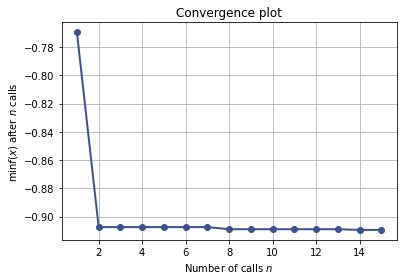

In [ ]:
from skopt.plots import plot_convergence
plot_convergence(result)

## Accuracy Score obtained by the parameters selected by bayesian optimization algorithm

In [16]:
rf = RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=1500,max_features=0.6883717288761102,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"accuracy for parameters selected by BayesianOptimization : {accuracy_score(y_test,y_pred) *100.0}%")


accuracy for parameters selected by BayesianOptimization : 95.0%


Without maxfeature parameters accuracy is 92.5%

In [17]:
rf = RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=1500,random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"accuracy for parameters selected by BayesianOptimization : {accuracy_score(y_test,y_pred) *100.0}%")


accuracy for parameters selected by BayesianOptimization : 92.5%


## hyperparameter optimization is hyperopt. hyperopt uses Tree-structured Parzen Estimator (TPE) to find the most optimal parameters.

In [ ]:
!pip install hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, Trials
from hyperopt.pyll.base import scope

In [ ]:
def optimize(params, x, y):
  
  # initialize model with current parameters
  model = RandomForestClassifier(**params)
  # initialize stratified k-fold
  kf = StratifiedKFold(n_splits=5)
  # initialize accuracy list
  accuracies = []
  # loop over all folds
  for idx in kf.split(X=x, y=y):
    train_idx, test_idx = idx[0], idx[1]
    xtrain,xtest = x[train_idx],x[test_idx]
    ytrain,ytest = y[train_idx],y[test_idx]
    # fit model for current fold
    model.fit(xtrain, ytrain)
    #create predictions
    preds = model.predict(xtest)
    # calculate and append accuracy
    fold_accuracy = accuracy_score(ytest,preds)
    accuracies.append(fold_accuracy)
  # return negative accuracy
  return -1 * np.mean(accuracies)

In [ ]:
# define a parameter space
# now we use hyperopt
param_space = {
# quniform gives round(uniform(low, high) / q) * q
# we want int values for depth and estimators
"max_depth": scope.int(hp.quniform("max_depth", 1, 15, 1)),
"n_estimators": scope.int(hp.quniform("n_estimators", 100, 1500, 1)),
# choice chooses from a list of values
"criterion": hp.choice("criterion", ["gini", "entropy"]),
# uniform chooses a value between two values
"max_features": hp.uniform("max_features", 0, 1)
}

In [ ]:
param_space

{'criterion': <hyperopt.pyll.base.Apply at 0x7f9e78c7f4d0>,
 'max_depth': <hyperopt.pyll.base.Apply at 0x7f9e78c7f250>,
 'max_features': <hyperopt.pyll.base.Apply at 0x7f9e78c7fd90>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x7f9e78c7f150>}

In [ ]:
# partial function
optimization_function = partial(optimize,x=X.values,y=Y.values)
# initialize trials to keep logging information
trials = Trials()
# run hyperopt
hopt = fmin(fn=optimization_function,
             space=param_space,
            algo=tpe.suggest,
            max_evals=15,
            trials=trials
           )

100%|██████████| 15/15 [04:03<00:00, 16.25s/it, best loss: -0.909]


In [ ]:
print(hopt)

{'criterion': 1, 'max_depth': 9.0, 'max_features': 0.7392905687326614, 'n_estimators': 282.0}


In [ ]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1


In [ ]:
train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
test_new = test[X.columns]

## Validation Accuracy Score -hyperopt parameters : {'criterion': 1, 'max_depth': 9.0, 'max_features': 0.7392905687326614, 'n_estimators': 282.0}

In [ ]:
rf = RandomForestClassifier(criterion='entropy', 
                            max_depth=9.0, 
                            max_features= 0.7392905687326614, 
                            n_estimators= 282,
                            random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.10,stratify=Y,random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9.0,
                       max_features=0.7392905687326614, n_estimators=282,
                       random_state=42)

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
print(f"accuracy for parameters selected by hyperopt (optuna) : {accuracy_score(y_test,y_pred) *100.0}%")

accuracy for parameters selected by hyperopt (optuna) : 95.5%


In [26]:
rf = RandomForestClassifier(criterion='entropy', 
                            max_depth=9.0, 
                            n_estimators= 282,
                            random_state=42)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(f"accuracy for parameters selected by hyperopt (optuna) : {accuracy_score(y_test,y_pred) *100.0}%")

accuracy for parameters selected by hyperopt (optuna) : 92.5%


## Final  Result 
* GridSearchCV : {'criterion': 'entropy', 'max_depth': 10, 'max_features': 0.855239859975857, 'n_estimators': 500, 'random_state': 100} **Accuracy Score 95.0%**
* RandomizedSearchCV : {'random_state': 42, 'n_estimators': 500, 'max_features': 0.5311153082821708, 'max_depth': 10, 'criterion': 'entropy'} **Accuracy Score 95.5%**

* HalvingGridSearchCV : {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.855239859975857, 'n_estimators': 200, 'random_state': 42} **Accuracy Score: 92.0%**

* HalvingRandomSearchCV : {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.855239859975857, 'n_estimators': 200, 'random_state': 42} **Accuracy Score 92.0%**

* Bayesian Optimization -skopt {'max_depth': 11, 'n_estimators': 1500, 'criterion': 'entropy', 'max_features': 0.6883717288761102} **Accuracy Score 95.0%**

* hyperopt {'criterion': 1, 'max_depth': 9.0, 'max_features': 0.7392905687326614, 'n_estimators': 282.0} **Accuracy Score 95.5%**